In [16]:

import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
df=pd.read_csv("bank-full (2).csv",sep=';')

In [2]:
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [10]:
df=df.dropna()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
df1=pd.get_dummies(df,columns=['job','marital','education',
                                   'contact','poutcome','month'])
df1


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
pd.set_option("display.max.columns",None)
df1
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [17]:
df1['default']=np.where(df1['default'].str.contains("yes"),1,0)
df1['housing']=np.where(df1['housing'].str.contains("yes"),1,0)
df1['loan']=np.where(df1['loan'].str.contains("yes"),1,0)
df1['y']=np.where(df1['y'].str.contains("yes"),1,0)
df1
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [19]:
x=pd.concat([df1.iloc[:,0:10],df1.iloc[:,11:]],axis=1)
y=df1.iloc[:,10]
classifier=LogisticRegression()
classifier.fit(x,y)


C:\Users\rasul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred=classifier.predict(x)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [21]:
confusion_matrix=confusion_matrix(y,y_pred)
confusion_matrix


array([[39451,   471],
       [ 4553,   736]], dtype=int64)

In [22]:
#model accuracy by (a+d)/(a+d+b+c)
(3900+2500)/(3900+5500+45210+2500)


0.1120644370513045

In [23]:
classifier.predict_proba(x)[:,1]


array([0.06848598, 0.04901138, 0.04180548, ..., 0.43411641, 0.05744505,
       0.26883334])

In [24]:
classifier.coef_


array([[-1.73173501e-02, -1.38766484e-02,  4.18623347e-06,
        -5.10101977e-01, -1.45102557e-01, -3.14511521e-02,
         2.85056427e-03, -4.10028164e-01,  2.68248229e-03,
         1.71092853e-03, -2.10841288e-02, -1.94069769e-01,
        -2.00225160e-02, -6.10272665e-03,  6.12906616e-03,
         1.25393105e-01, -1.17649343e-02, -6.80179053e-02,
         2.17073259e-02, -5.35282630e-02,  2.46750425e-03,
         1.92481864e-03,  1.33953478e-02, -1.30963207e-01,
        -9.94005640e-02, -5.19752029e-02, -2.11296746e-01,
         3.59070667e-02,  1.03964586e-02,  7.00036674e-02,
         3.76469870e-02, -3.24619078e-01, -9.84184648e-02,
        -2.20690669e-02,  2.33579253e-01, -3.30060145e-01,
         3.15979035e-02,  1.65873164e-02,  2.14372862e-02,
        -1.09585793e-02, -7.86847901e-03, -6.23001944e-02,
        -4.34130145e-02,  6.43112681e-02, -3.18084617e-01,
        -3.83670052e-02,  7.42390268e-02,  5.58506647e-02]])

In [25]:
pd.crosstab(y_pred,y)


y,0,1
row_0,,
0,39451,4553
1,471,736


In [26]:
pd.crosstab(y_pred,y)


y,0,1
row_0,,
0,39451,4553
1,471,736


In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [28]:
Logit_roc_score=roc_auc_score(y,classifier.predict(x))
Logit_roc_score


0.5636793671463476

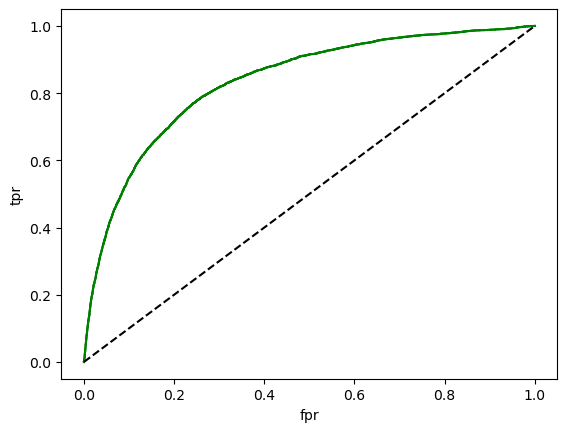

In [30]:
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='green')
acu=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='green',label='logit model(area=%0.2f)'%Logit_roc_score)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()
